In [ ]:
!cat 'datasets/bitly_usagov/example.txt'

In [4]:
path = 'datasets/bitly_usagov/example.txt'
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [5]:
#data loading(json formated)

import json
path = 'datasets/bitly_usagov/example.txt'
records = [json.loads(line)for line in open(path)] #json.loads將json架構轉換成為python架構
records[0]  #[{:},{:},{:}]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

In [6]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec] #使用list comprehension過濾出資料

In [7]:
time_zones[:10] #[str,str,str,str]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

In [8]:
from collections import defaultdict #使用defaultdict 計算出相同timeZones的數量

def get_counts(sequence):
    counts = defaultdict(int)
    for x in sequence:
        counts[x] += 1
    return counts
counts = get_counts(time_zones) #counts {'timezones':數量,'timezones':數量}
counts['America/New_York']


1251

In [9]:
def top_counts(count_dict, n=10): #純python取出前10名
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()] #[(數量,timezone),(數量,timezone)]
    value_key_pairs.sort() #由小到大排序
    return value_key_pairs[-n:] #slicing

top_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

In [10]:
from collections import Counter #使用Counter取出前10名
counts = Counter(time_zones) 
counts.most_common(10) #取出前10名[('timeZones:數量','timeZones:數量', 'timeZone:數量')]

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

In [11]:
import pandas as pd #使用pandas取出前10名
frame = pd.DataFrame(records) #pandas的Structure
frame.info() #使用info()方法查看index,查看筆數3560,查看columns的label名和每個columns資料的dtype和數量

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
a              3440 non-null object
c              2919 non-null object
nk             3440 non-null float64
tz             3440 non-null object
gr             2919 non-null object
g              3440 non-null object
h              3440 non-null object
l              3440 non-null object
al             3094 non-null object
hh             3440 non-null object
r              3440 non-null object
u              3440 non-null object
t              3440 non-null float64
hc             3440 non-null float64
cy             2919 non-null object
ll             2919 non-null object
_heartbeat_    120 non-null float64
kw             93 non-null object
dtypes: float64(4), object(14)
memory usage: 500.8+ KB


In [12]:
frame['tz'][:10] #pandas的indexing 和 selection

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

In [13]:
tz_counts = frame['tz'].value_counts() #value_counts計算內容相同的數量,產生新的Series,原來的值成為Series的index,value成為數量

In [14]:
print(tz_counts)

America/New_York                  1251
                                   521
America/Chicago                    400
America/Los_Angeles                382
America/Denver                     191
                                  ... 
America/Argentina/Buenos_Aires       1
Asia/Kuching                         1
Europe/Volgograd                     1
America/La_Paz                       1
America/Tegucigalpa                  1
Name: tz, Length: 97, dtype: int64


In [15]:
clean_tz = frame['tz'].fillna('Missing') #DataCleaning(handling Missing Data)

In [16]:
clean_tz[clean_tz == ''] = 'Unknown'

In [17]:
tz_counts = clean_tz.value_counts()
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

<IPython.core.display.Javascript object>


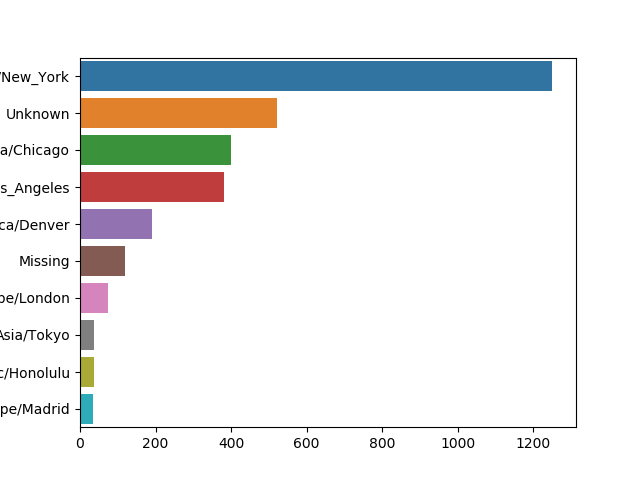

In [18]:
%matplotlib notebook
import seaborn as sns
subset = tz_counts[:10]
sns.barplot(y=subset.index, x=subset.values)